#Modules

In [21]:
import pandas as pd
import numpy as np
import gensim
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency
import seaborn as sns
import spacy  # For preprocessing
import warnings
warnings.filterwarnings('ignore')
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, preprocessing,ensemble, metrics, decomposition
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn import preprocessing
from pandas.core.common import random_state
from sklearn.metrics import mean_absolute_percentage_error


random_state=2022

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
bow_data=pd.read_csv('/content/drive/MyDrive/NLP/Dataset/bow_dataset.csv')
tf_idf_data=pd.read_csv('/content/drive/MyDrive/NLP/Dataset/tfidf_dataset.csv')
w2v_df=pd.read_csv('/content/drive/MyDrive/NLP/Dataset/w2v_df.csv')
d2v_df=pd.read_csv('/content/drive/MyDrive/NLP/Dataset/d2v_df.csv')

In [24]:
bow_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,861,862,863,864,865,866,867,869,871,874
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0.632390,0.282576,8,0,10
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0.405556,0.168056,9,0,2
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0.000000,0.000000,25,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.333333,0.250000,28,0,0
4,4,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.333333,0.166667,28,2,0


In [25]:
dropped = ['Unnamed: 0']
data = bow_data.drop(dropped,axis=1)
bow_data=data
bow_data.astype(str)

,0,1,2,3,4,5,6,7,8,9,...,861,862,863,864,865,866,867,869,871,874
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0.6323898323898324,0.2825757575757575,8,0,10
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0.4055555555555556,0.1680555555555555,9,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0.0,0.0,25,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.3333333333333333,0.25,28,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.3333333333333333,0.1666666666666666,28,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.506628787878788,0.428030303030303,6,4,0
41737,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0.4166666666666667,0.4916666666666667,7,1,1
41738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.5104166666666666,0.2604166666666666,8,1,0
41739,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0.7083333333333334,0.4458333333333333,7,0,0


In [26]:
bow_data1 = preprocessing.MinMaxScaler(feature_range=(0, 1))
bow_normalized_df = pd.DataFrame(bow_data1.fit_transform(bow_data),  columns = bow_data.columns)

#bow

In [27]:
# y = np.ravel(data[806])
y=bow_normalized_df.iloc[ :, -1:]  #Target Variable          
X=bow_normalized_df.iloc[: , :-1]  #Feature Matrix 

# X=pd.DataFrame(X)
# y=pd.DataFrame(y)

# y.head()

In [28]:
X

,0,1,2,3,4,5,6,7,8,9,...,860,861,862,863,864,865,866,867,869,871
0,0.0,0.0,0.0,0.0,0.25,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.632390,0.641288,0.166667,0.000000
1,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.405556,0.584028,0.187500,0.000000
2,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.500000,0.520833,0.000000
3,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.625000,0.583333,0.000000
4,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.333333,0.583333,0.583333,0.057143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.506629,0.714015,0.125000,0.114286
41737,0.0,0.0,0.0,0.0,0.00,0.0,0.333333,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.416667,0.745833,0.145833,0.028571
41738,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.510417,0.630208,0.166667,0.028571
41739,0.0,0.0,0.0,0.0,0.00,0.0,0.333333,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.708333,0.722917,0.145833,0.000000


In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

In [30]:
def hyperparameter_Tuning():
      model_rand = RandomForestRegressor()
      n_estimators = [5,20,50,100] # number of trees in the random forest
      max_features = ['auto', 'sqrt'] # number of features in consideration at every split
      max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
      min_samples_split = [2, 6, 10] # minimum sample number to split a node
      min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
      bootstrap = [True, False] # method used to sample data points
      random_grid = {'n_estimators': n_estimators,
      'max_features': max_features,
      'max_depth': max_depth,
      'min_samples_split': min_samples_split,
      'min_samples_leaf': min_samples_leaf,
      'bootstrap': bootstrap}
      rf_random = RandomizedSearchCV(estimator = model_rand,param_distributions = random_grid,n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
      rf_random.fit(x_train, y_train)
      return rf_random.best_params_

In [31]:
rnd_clf = RandomForestRegressor(n_estimators=20, min_samples_split=10, min_samples_leaf=4,max_features='sqrt',max_depth=10,bootstrap=True)
rnd_clf.fit(x_train, y_train)
y_pred_bow = rnd_clf.predict(x_test)
y_pred_bow_=pd.DataFrame(y_pred_bow)

In [32]:
type(y_pred_bow)

numpy.ndarray

In [33]:
y_pred_bow_[0].max()

0.4454868285734442

In [34]:
y_test

,874
20081,0.000000
1790,0.000000
27516,0.019231
15354,0.000000
20071,0.019231
...,...
27133,0.000000
27800,0.019231
21343,0.038462
13477,0.057692


In [35]:
y_test['874'].max()

1.0

In [36]:
type(y_pred_bow)

numpy.ndarray

In [37]:
max(y_pred_bow)

0.4454868285734442

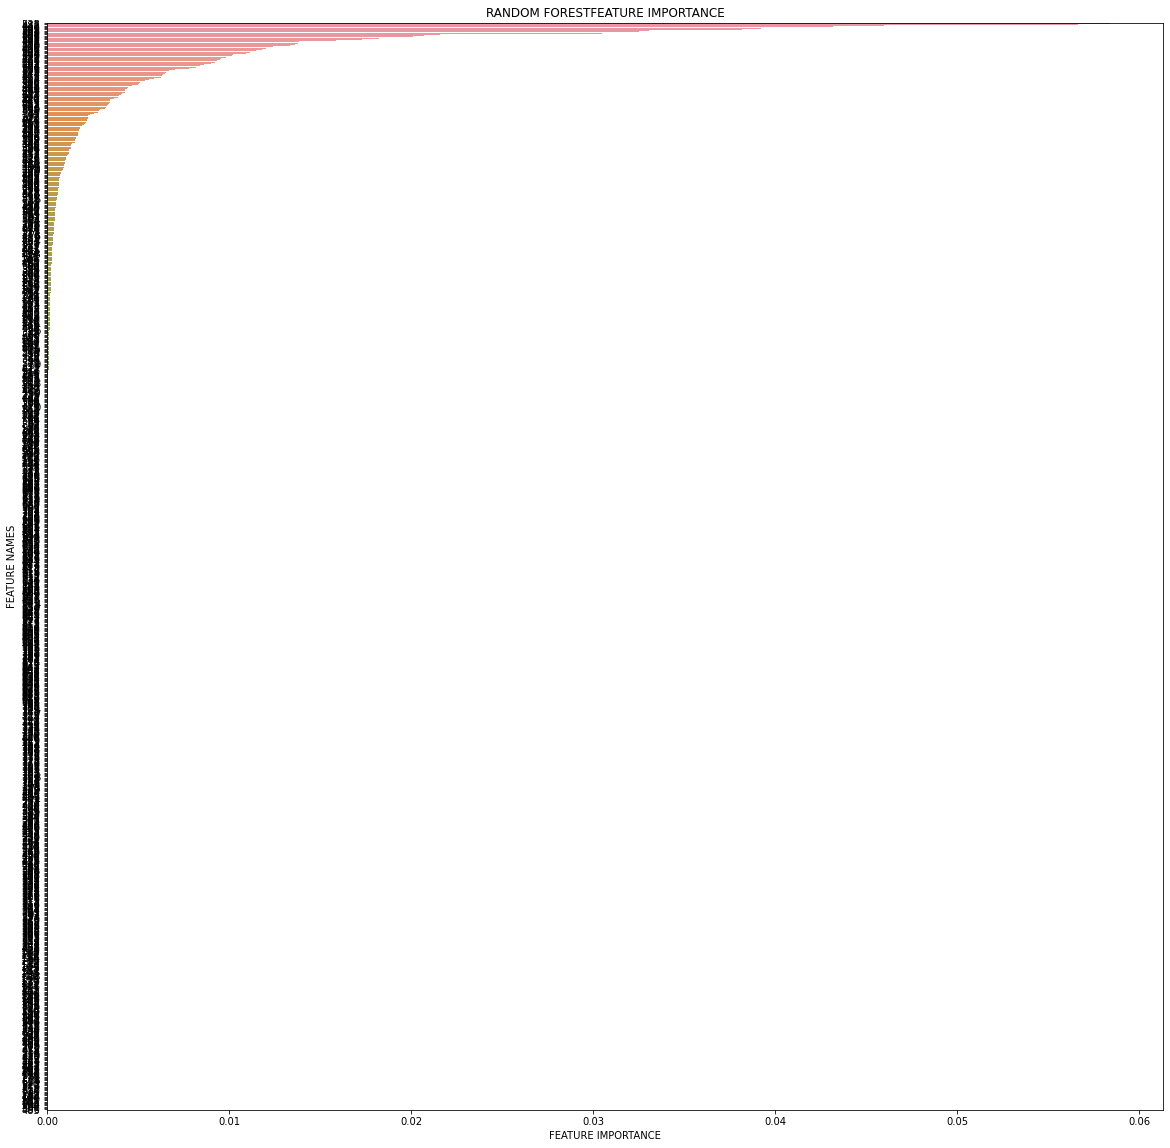

In [38]:
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(20,20))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

plot_feature_importance(rnd_clf.feature_importances_,x_train.columns,'RANDOM FOREST')

In [39]:
def metrics(actual,predicted):
  rmse = np.sqrt(mean_squared_error(actual, predicted))
  print("RMSE: %f" % (rmse))
  print()

  R2=r2_score(actual,predicted)
  print("R2 Score: %f" % (R2))
  print()

  MAE=mean_absolute_error(actual,predicted)
  print("MAE : %f" % (MAE))
  print()

  MSE=mean_squared_error(actual,predicted)
  print("MSE : %f" % (MSE))
  print()


  RMSLE=np.log(np.sqrt(mean_squared_error(actual,predicted)))
  print("RMSLE : %f" % (RMSLE))
  print()

  max_error_=max_error(actual,predicted)
  print("max_error : %f" % (max_error_))
  print()

metrics(y_test,y_pred_bow_)

RMSE: 0.038954

R2 Score: 0.501989

MAE : 0.024828

MSE : 0.001517

RMSLE : -3.245369

max_error : 0.965820



In [40]:
# print(p1,p2)

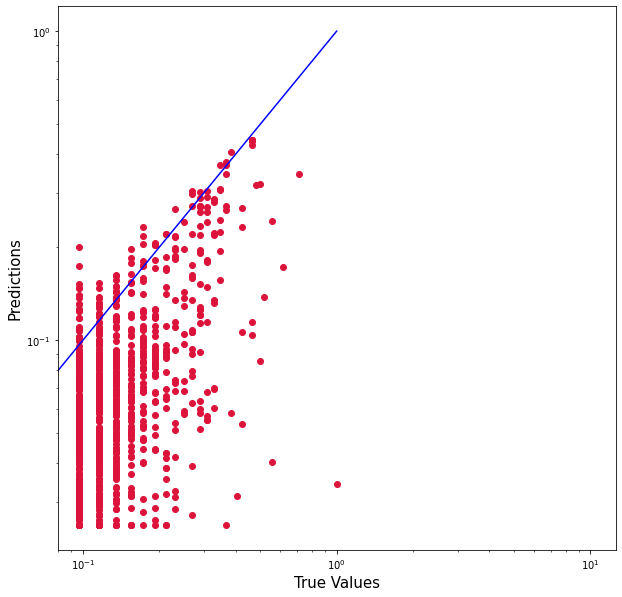

In [41]:

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_bow_, c='crimson')
plt.yscale('log')
plt.xscale('log')


p1 = max(y_pred_bow_[0].max(), y_test['874'].max())
p2 = min(y_pred_bow_[0].min(), y_test['874'].min())
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
ax = plt.axes()
plt.show()

#tfid

In [42]:
tf_idf_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,815,816,817,818,819,820,821,823,825,828
0,0,0.0,0.0,0.0,0.0,0.202957,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0.632390,0.282576,8,0,10
1,1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0.405556,0.168056,9,0,2
2,2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0.000000,0.000000,25,0,0
3,3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0.333333,0.250000,28,0,0
4,4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0.333333,0.166667,28,2,0


In [43]:
dropped = ['Unnamed: 0']
data = tf_idf_data.drop(dropped,axis=1)
tf_idf_data=data

In [44]:
tfidf_data1 = preprocessing.MinMaxScaler(feature_range=(0, 1))
tfidf_normalized_df = pd.DataFrame(tfidf_data1.fit_transform(tf_idf_data),  columns = tf_idf_data.columns)

In [45]:
y=tfidf_normalized_df.iloc[ :, -1:]  #Target Variable          
X=tfidf_normalized_df.iloc[: , :-1]  #Feature Matrix 

# y.head()

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

In [47]:
rnd_clf = RandomForestRegressor(n_estimators=20, min_samples_split=10, min_samples_leaf=4,max_features='sqrt',max_depth=10,bootstrap=True)
rnd_clf.fit(x_train, y_train)
y_pred_tfidf = rnd_clf.predict(x_test)
y_pred_tfidf_=pd.DataFrame(y_pred_tfidf)

# metrics(y_test,y_pred_tfidf_)

In [48]:
y_test

,828
20081,0.000000
1790,0.000000
27516,0.019231
15354,0.000000
20071,0.019231
...,...
27133,0.000000
27800,0.019231
21343,0.038462
13477,0.057692


In [49]:
type(y_test)

pandas.core.frame.DataFrame

In [50]:
type(y_pred_tfidf_)

pandas.core.frame.DataFrame

In [51]:
y_test

,828
20081,0.000000
1790,0.000000
27516,0.019231
15354,0.000000
20071,0.019231
...,...
27133,0.000000
27800,0.019231
21343,0.038462
13477,0.057692


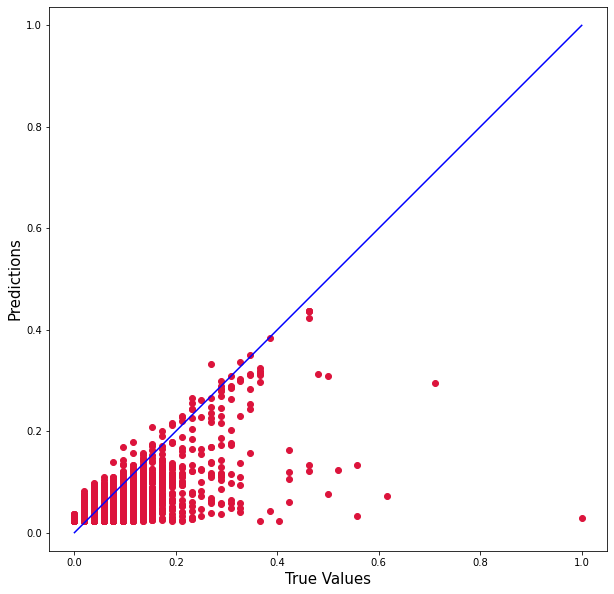

In [52]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_tfidf_, c='crimson')

p1 = max(y_pred_tfidf_[0].max(), y_test['828'].max())
p2 = min(y_pred_tfidf_[0].min(), y_test['828'].min())
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

#w2v

In [53]:
w2v_df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1011,1012,1013,1014,1015,1016,1018,1020,1023,1024
0,0,0.440175,0.485191,0.587695,0.585352,0.398419,0.435185,0.437130,0.410533,0.516202,...,0.0,0.0,0.0,0.001996,0.001209,1.0,0.166667,0.000000,0.192308,0.005571
1,1,0.439598,0.391996,0.498240,0.555270,0.422490,0.516015,0.405562,0.436408,0.577282,...,0.0,0.0,0.0,0.001996,0.001209,1.0,0.187500,0.000000,0.038462,0.008959
2,2,0.498305,0.628040,0.523453,0.595455,0.576013,0.499553,0.303011,0.306349,0.461778,...,0.0,1.0,0.0,0.019871,0.014965,0.5,0.520833,0.000000,0.000000,0.030561
3,3,0.677892,0.666789,0.506650,0.476117,0.498457,0.381619,0.401607,0.412709,0.543147,...,0.0,0.0,0.0,0.019871,0.014965,1.0,0.583333,0.000000,0.000000,0.029139
4,4,0.571104,0.508060,0.440763,0.579581,0.470572,0.444646,0.463706,0.399712,0.534334,...,0.0,0.0,0.0,0.019871,0.014965,1.0,0.583333,0.057143,0.000000,0.029139


In [54]:
dropped = ['Unnamed: 0']
data = w2v_df.drop(dropped,axis=1)
w2v_df=data

In [55]:
w2v_df1 = preprocessing.MinMaxScaler(feature_range=(0, 1))
w2vec_normalized_df = pd.DataFrame(w2v_df1.fit_transform(w2v_df),  columns = w2v_df.columns)

In [56]:
y=w2vec_normalized_df.iloc[ :, -1:]  #Target Variable          
X=w2vec_normalized_df.iloc[: , :-1]  #Feature Matrix 



X=pd.DataFrame(X)
y=pd.DataFrame(y)
for i in X.columns:
  X[i]=pd.to_numeric(X[i])
for i in y.columns:
  y[i]=pd.to_numeric(y[i])


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2022)

In [57]:
rnd_clf = RandomForestRegressor(n_estimators=100, min_samples_split=10 , min_samples_leaf=4, max_features='auto',max_depth=50,bootstrap=True)
rnd_clf.fit(x_train, y_train)
y_pred_w2vec = rnd_clf.predict(x_test)

In [58]:
metrics(y_test,y_pred_w2vec)

RMSE: 0.018930

R2 Score: 0.920011

MAE : 0.004687

MSE : 0.000358

RMSLE : -3.967015

max_error : 0.502661



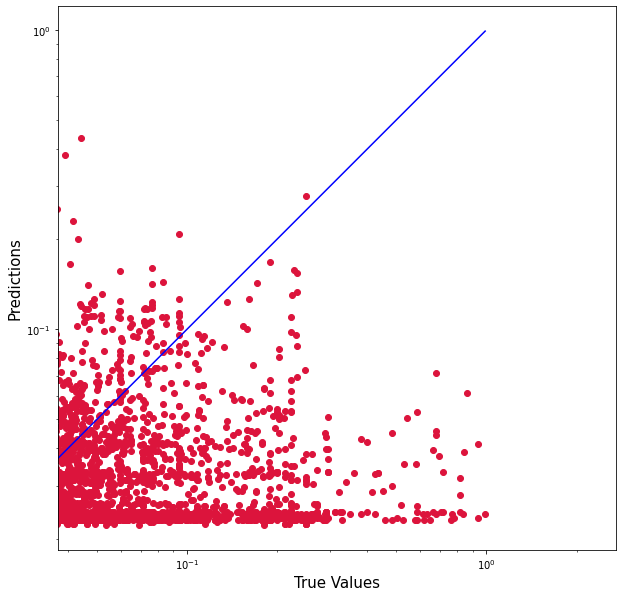

In [59]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_tfidf_, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(y_pred_tfidf_[0].max(), y_test['1024'].max())
p2 = min(y_pred_tfidf_[0].min(), y_test['1024'].min())
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

#d2v

In [60]:
d2v_df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1211,1212,1213,1214,1215,1216,1218,1220,1223,1224
0,0,0.368360,0.557300,0.592499,0.579223,0.374454,0.460472,0.436838,0.615206,0.362663,...,0.0,0.0,0.0,0.001996,0.001209,1.0,0.166667,0.000000,0.192308,0.005571
1,1,0.409319,0.541178,0.523558,0.508291,0.320311,0.512994,0.401727,0.554929,0.387721,...,0.0,0.0,0.0,0.001996,0.001209,1.0,0.187500,0.000000,0.038462,0.008959
2,2,0.485085,0.542153,0.539946,0.550250,0.565587,0.401578,0.624751,0.308196,0.622911,...,0.0,1.0,0.0,0.019871,0.014965,0.5,0.520833,0.000000,0.000000,0.030561
3,3,0.644376,0.541030,0.576122,0.577396,0.501819,0.560930,0.561669,0.442864,0.521159,...,0.0,0.0,0.0,0.019871,0.014965,1.0,0.583333,0.000000,0.000000,0.029139
4,4,0.568752,0.729264,0.574859,0.483465,0.502268,0.463491,0.466647,0.407807,0.578999,...,0.0,0.0,0.0,0.019871,0.014965,1.0,0.583333,0.057143,0.000000,0.029139


In [61]:
dropped = ['Unnamed: 0']
data = d2v_df.drop(dropped,axis=1)
d2v_df=data

In [62]:
d2v_df1 = preprocessing.MinMaxScaler(feature_range=(0, 1))
d2vec_normalized_df = pd.DataFrame(d2v_df1.fit_transform(d2v_df),  columns = d2v_df.columns)

In [63]:
y=d2v_df.iloc[ :, -1:]  #Target Variable          
X=d2v_df.iloc[: , :-1]  #Feature Matrix 

X=pd.DataFrame(X)
y=pd.DataFrame(y)

for i in X.columns:
  X[i]=pd.to_numeric(X[i])
for i in y.columns:
  y[i]=pd.to_numeric(y[i])


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [64]:
rnd_clf = RandomForestRegressor(n_estimators=100, min_samples_split=10 , min_samples_leaf=4, max_features='auto',max_depth=50,bootstrap=True)
rnd_clf.fit(x_train, y_train)
y_pred_d2vec = rnd_clf.predict(x_test)

metrics(y_test,y_pred_d2vec)

RMSE: 0.019501

R2 Score: 0.916309

MAE : 0.005409

MSE : 0.000380

RMSLE : -3.937272

max_error : 0.629854



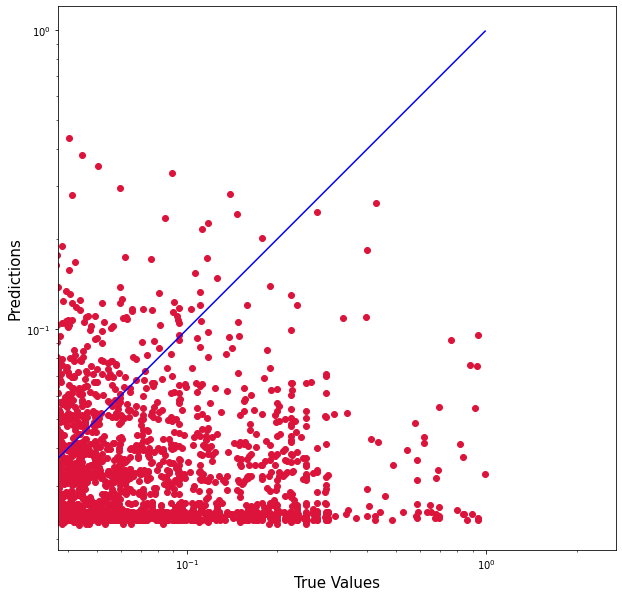

In [66]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_tfidf_, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(y_pred_tfidf_[0].max(), y_test['1224'].max())
p2 = min(y_pred_tfidf_[0].min(), y_test['1224'].min())
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()